In [14]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [9]:
# Load data set from CSV file
df = pd.read_csv(r'diabetes.csv')

In [10]:
df

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy,Diabetes
0,26,1,20.1,119,81,5.80,4.36,0.86,0.90,2.43,12.0,5.40,63.8,5.40,3.000000,3.000000,0,0
1,40,1,17.7,97,54,4.60,3.70,1.02,1.50,2.04,9.2,3.70,70.3,4.10,1.000000,1.000000,0,0
2,40,2,19.7,85,53,5.30,5.87,1.29,1.75,3.37,10.1,4.10,61.1,4.85,3.000000,3.000000,0,0
3,43,1,23.1,111,71,4.50,4.05,0.74,1.27,2.60,36.5,4.38,73.4,5.30,2.000000,3.000000,0,0
4,36,1,26.5,130,82,5.54,6.69,3.49,0.91,3.64,69.3,3.86,67.5,5.53,3.000000,3.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4298,54,1,23.4,126,75,6.82,5.00,1.50,1.24,2.98,8.0,3.50,77.0,6.70,1.000000,3.000000,0,1
4299,50,2,22.3,115,84,5.32,4.37,2.09,1.37,2.29,21.2,4.40,47.3,6.55,4.860753,4.860753,0,1
4300,67,1,24.6,138,81,4.85,3.89,1.38,1.14,2.17,18.1,4.73,70.6,6.80,3.000000,3.000000,0,1
4301,60,2,29.0,101,60,6.70,5.91,1.29,1.73,2.85,18.9,7.33,50.2,7.00,3.000000,3.000000,0,1


### Training and test set split

In [11]:
# Split the dataset into features (X) and labels (y)
X = df.drop(columns=['Diabetes'])  
y = df['Diabetes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

### Scaling

In [12]:
# Feature scaling
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Classifiers - Perceptron, SVM Linear, SVM RBF, Decision Tree

In [13]:
classifiers = {
    'Perceptron': Perceptron(eta0=0.1, random_state=1),
    'SVM_linear': SVC(kernel='linear', C=1.0, random_state=1),
    'SVM_RBF': SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0),
    'DecisionTree': DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=1)
}

### Results

In [15]:
for classifier_name, classifier in classifiers.items():
    print(f"Running {classifier_name}")
    start = time.time()
    classifier.fit(X_train_std, y_train)
    end = time.time()

    y_pred = classifier.predict(X_test_std)
    print('Misclassified examples: %d' % (y_test != y_pred).sum())
    print("Time:", end - start)
    print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
    print()

Running Perceptron
Misclassified examples: 90
Time: 0.0029573440551757812
Accuracy: 0.9303

Running SVM_linear
Misclassified examples: 56
Time: 0.12663841247558594
Accuracy: 0.9566

Running SVM_RBF
Misclassified examples: 75
Time: 0.10061049461364746
Accuracy: 0.9419

Running DecisionTree
Misclassified examples: 56
Time: 0.01502680778503418
Accuracy: 0.9566



### Classifier - kNN

In [16]:
# KNN classifier
knn_start_time = time.time()
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')

# Training model
knn.fit(X_train_std, y_train)
knn_end_time = time.time()

# Making predictions
y_train_pred = knn.predict(X_train_std)
y_test_pred = knn.predict(X_test_std)

# Accuracy scores
knn_train = accuracy_score(y_train, y_train_pred)
knn_test = accuracy_score(y_test, y_test_pred)

print('KNN-Training Accuracy: {:.3f}, Testing Accuracy: {:.3f}'.format(knn_train, knn_test))

# Printing the training time
knn_time = (knn_end_time - knn_start_time)
print('KNN-Training Time:{:.6f}s'.format(knn_time))

# Evaluation metrics
confusion_matrix_result = confusion_matrix(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

print('Confusion Matrix:\n', confusion_matrix_result)
print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('Misclassified examples: %d' % (y_test != y_test_pred).sum())

KNN-Training Accuracy: 0.959, Testing Accuracy: 0.947
KNN-Training Time:0.004002s
Confusion Matrix:
 [[889  11]
 [ 57 334]]
Precision: 0.968
Recall: 0.854
Misclassified examples: 68


### Classifier - Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr', max_iter=10000)
start_time = time.time()
lr.fit(X_train_std, y_train)
end_time = time.time()

# Predict
y_train_pred = lr.predict(X_train_std)
y_test_pred = lr.predict(X_test_std)

# Accuracy scores
lr_train = accuracy_score(y_train, y_train_pred)
lr_test = accuracy_score(y_test, y_test_pred)

# Printing the training time
lr_time = (end_time - start_time)

# Evaluation metrics
confusion_matrix_result = confusion_matrix(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

print('Logistic Regression - Training Accuracy: {:.2f}, Testing Accuracy: {:.2f}'.format(lr_train, lr_test))
print('Logistic Regression - Training Time: {:.2f}s'.format(lr_time))
print('Confusion Matrix:\n', confusion_matrix_result)
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))

Logistic Regression - Training Accuracy: 0.95, Testing Accuracy: 0.96
Logistic Regression - Training Time: 0.03s
Confusion Matrix:
 [[887  13]
 [ 42 349]]
Precision: 0.96
Recall: 0.89


### Classifier - Gradient Boosting

In [24]:
# Create and train a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=200, random_state=1)
gb_start_time = time.time()

gb_classifier.fit(X_train_std, y_train)
gb_end_time = time.time()

# Predict training accuracy score
gb_train = accuracy_score(y_train, gb_classifier.predict(X_train_std))

# Predict test accuracy score
gb_test = accuracy_score(y_test, gb_classifier.predict(X_test_std))

# Evaluate other metrics: precision, recall, and confusion matrix
y_pred = gb_classifier.predict(X_test_std)
confusion_matrix_result = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Gradient Boosting - Training Accuracy: {:.2f}, Testing Accuracy: {:.2f}'.format(gb_train, gb_test))
print('Gradient Boosting - Training Time: {:.2f}s, Testing Time: {:.2f}s'.format(gb_end_time - gb_start_time, gb_end_time - gb_start_time))
print('Confusion Matrix:\n', confusion_matrix_result)
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))

Gradient Boosting - Training Accuracy: 0.99, Testing Accuracy: 0.95
Gradient Boosting - Training Time: 2.22s, Testing Time: 2.22s
Confusion Matrix:
 [[875  25]
 [ 39 352]]
Precision: 0.93
Recall: 0.90


### Classifier - Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Create and train a Gradient Boosting Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=1)
rf_start_time = time.time()

rf_classifier.fit(X_train_std, y_train)
rf_end_time = time.time()

# Predict training accuracy score
rf_train = accuracy_score(y_train, rf_classifier.predict(X_train_std))

# Predict test accuracy score
rf_test = accuracy_score(y_test, rf_classifier.predict(X_test_std))

# Evaluate other metrics: precision, recall, and confusion matrix
y_pred = rf_classifier.predict(X_test_std)
confusion_matrix_result = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Gradient Boosting - Training Accuracy: {:.2f}, Testing Accuracy: {:.2f}'.format(rf_train, rf_test))
print('Gradient Boosting - Training Time: {:.2f}s, Testing Time: {:.2f}s'.format(rf_end_time - rf_start_time, rf_end_time - rf_start_time))
print('Confusion Matrix:\n', confusion_matrix_result)
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))

Gradient Boosting - Training Accuracy: 1.00, Testing Accuracy: 0.96
Gradient Boosting - Training Time: 0.82s, Testing Time: 0.82s
Confusion Matrix:
 [[878  22]
 [ 35 356]]
Precision: 0.94
Recall: 0.91


### Classifier - Artificial Neural Network

41/41 [==============================] - 0s 2ms/step
Artificial Neural Network (ANN) - Training Accuracy: 0.99, Testing Accuracy: 0.95
ANN - Training Time: 26.10s, Testing Time: 26.10s
Confusion Matrix:
 [[866  34]
 [ 35 356]]
Precision: 0.91
Recall: 0.91


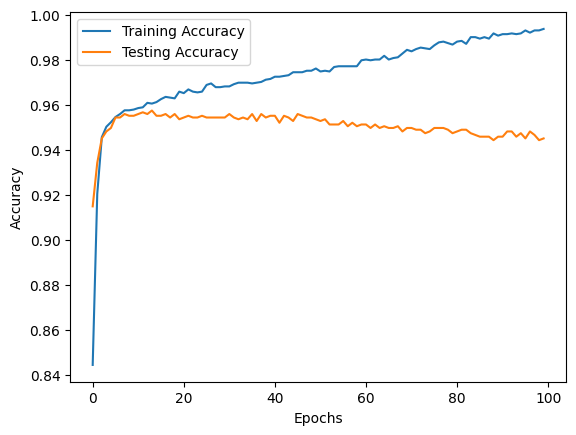

In [27]:
import tensorflow as tf

# Build an Artificial Neural Network (ANN) using TensorFlow and Keras
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_dim=X_train_std.shape[1]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
    
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

ann_start_time = time.time()

history = model.fit(X_train_std, y_train, epochs=100, batch_size=32, validation_data=(X_test_std, y_test), verbose=0)

ann_end_time = time.time()

# Extract training and testing accuracies from history
training_acc = history.history['accuracy']
testing_acc = history.history['val_accuracy']

threshold = 0.35

# Predict training accuracy score
ann_train = accuracy_score(y_train, (model.predict(X_train_std) > threshold).astype(int))

# Predict test accuracy score
ann_test = accuracy_score(y_test, (model.predict(X_test_std) > threshold).astype(int))


# Evaluate other metrics: precision, recall, and confusion matrix
y_pred = (model.predict(X_test_std) > threshold).astype(int)
confusion_matrix_result = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Artificial Neural Network (ANN) - Training Accuracy: {:.2f}, Testing Accuracy: {:.2f}'.format(ann_train, ann_test))
print('ANN - Training Time: {:.2f}s, Testing Time: {:.2f}s'.format(ann_end_time - ann_start_time, ann_end_time - ann_start_time))
print('Confusion Matrix:\n', confusion_matrix_result)
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))

# Plot training and testing accuracies
plt.plot(training_acc, label='Training Accuracy')
plt.plot(testing_acc, label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
def plotStyle():

    plt.rcParams['xtick.color'] = "323034"
    plt.rcParams['ytick.color'] = "323034"
    plt.rcParams['text.color'] = "323034"
    plt.rcParams['lines.markeredgecolor'] = "black"
    plt.rcParams['patch.facecolor'] = "bc80bd"
    plt.rcParams['patch.force_edgecolor'] = True
    plt.rcParams['patch.linewidth'] = 0.8
    plt.rcParams['scatter.edgecolors'] = "black"
    plt.rcParams['grid.color'] = "b1afb5"
    plt.rcParams['axes.titlesize'] = 16
    plt.rcParams['legend.title_fontsize'] = 12
    plt.rcParams['xtick.labelsize'] = 16
    plt.rcParams['ytick.labelsize'] = 16
    plt.rcParams['font.size'] = 15
    plt.rcParams['axes.prop_cycle'] = "(cycler('color', ['bc80bd', 'fb8072', 'b3de69', 'fdb462', 'fccde5', '8dd3c7', 'ffed6f', 'bebada', '80b1d3', 'ccebc5', 'd9d9d9']))"
    plt.rcParams['mathtext.fontset'] = "stix"
    plt.rcParams['font.family'] = "STIXGeneral"
    plt.rcParams['lines.linewidth'] = 2
    plt.rcParams['lines.markersize'] = 6
    plt.rcParams['legend.frameon'] = True
    plt.rcParams['legend.framealpha'] = 0.8
    plt.rcParams['legend.fontsize'] = 13
    plt.rcParams['legend.edgecolor'] = "black"
    plt.rcParams['legend.borderpad'] = 0.2
    plt.rcParams['legend.columnspacing'] = 1.5
    plt.rcParams['legend.labelspacing'] = 0.4
    plt.rcParams['text.usetex'] = False
    plt.rcParams['axes.labelsize'] = 17
    plt.rcParams['axes.titlelocation'] = "center"
    plt.rcParams['axes.formatter.use_mathtext'] = True
    plt.rcParams['axes.autolimit_mode'] = "round_numbers"
    plt.rcParams['axes.labelpad'] = 3
    plt.rcParams['axes.formatter.limits'] = (-4, 4)
    plt.rcParams['axes.labelcolor'] = "black"
    plt.rcParams['axes.edgecolor'] = "black"
    plt.rcParams['axes.linewidth'] = 1
    plt.rcParams['axes.grid'] = False
    plt.rcParams['axes.spines.right'] = True
    plt.rcParams['axes.spines.left'] = True
    plt.rcParams['axes.spines.top'] = True
    plt.rcParams['figure.titlesize'] = 18
    plt.rcParams['figure.autolayout'] = True
    plt.rcParams['figure.dpi'] = 300
    plt.rcParams['text.usetex'] = True
    plt.rcParams['text.latex.preamble'] = r'\usepackage{times}'
    plt.rcParams['font.family'] = 'Times New Roman'

plotStyle()

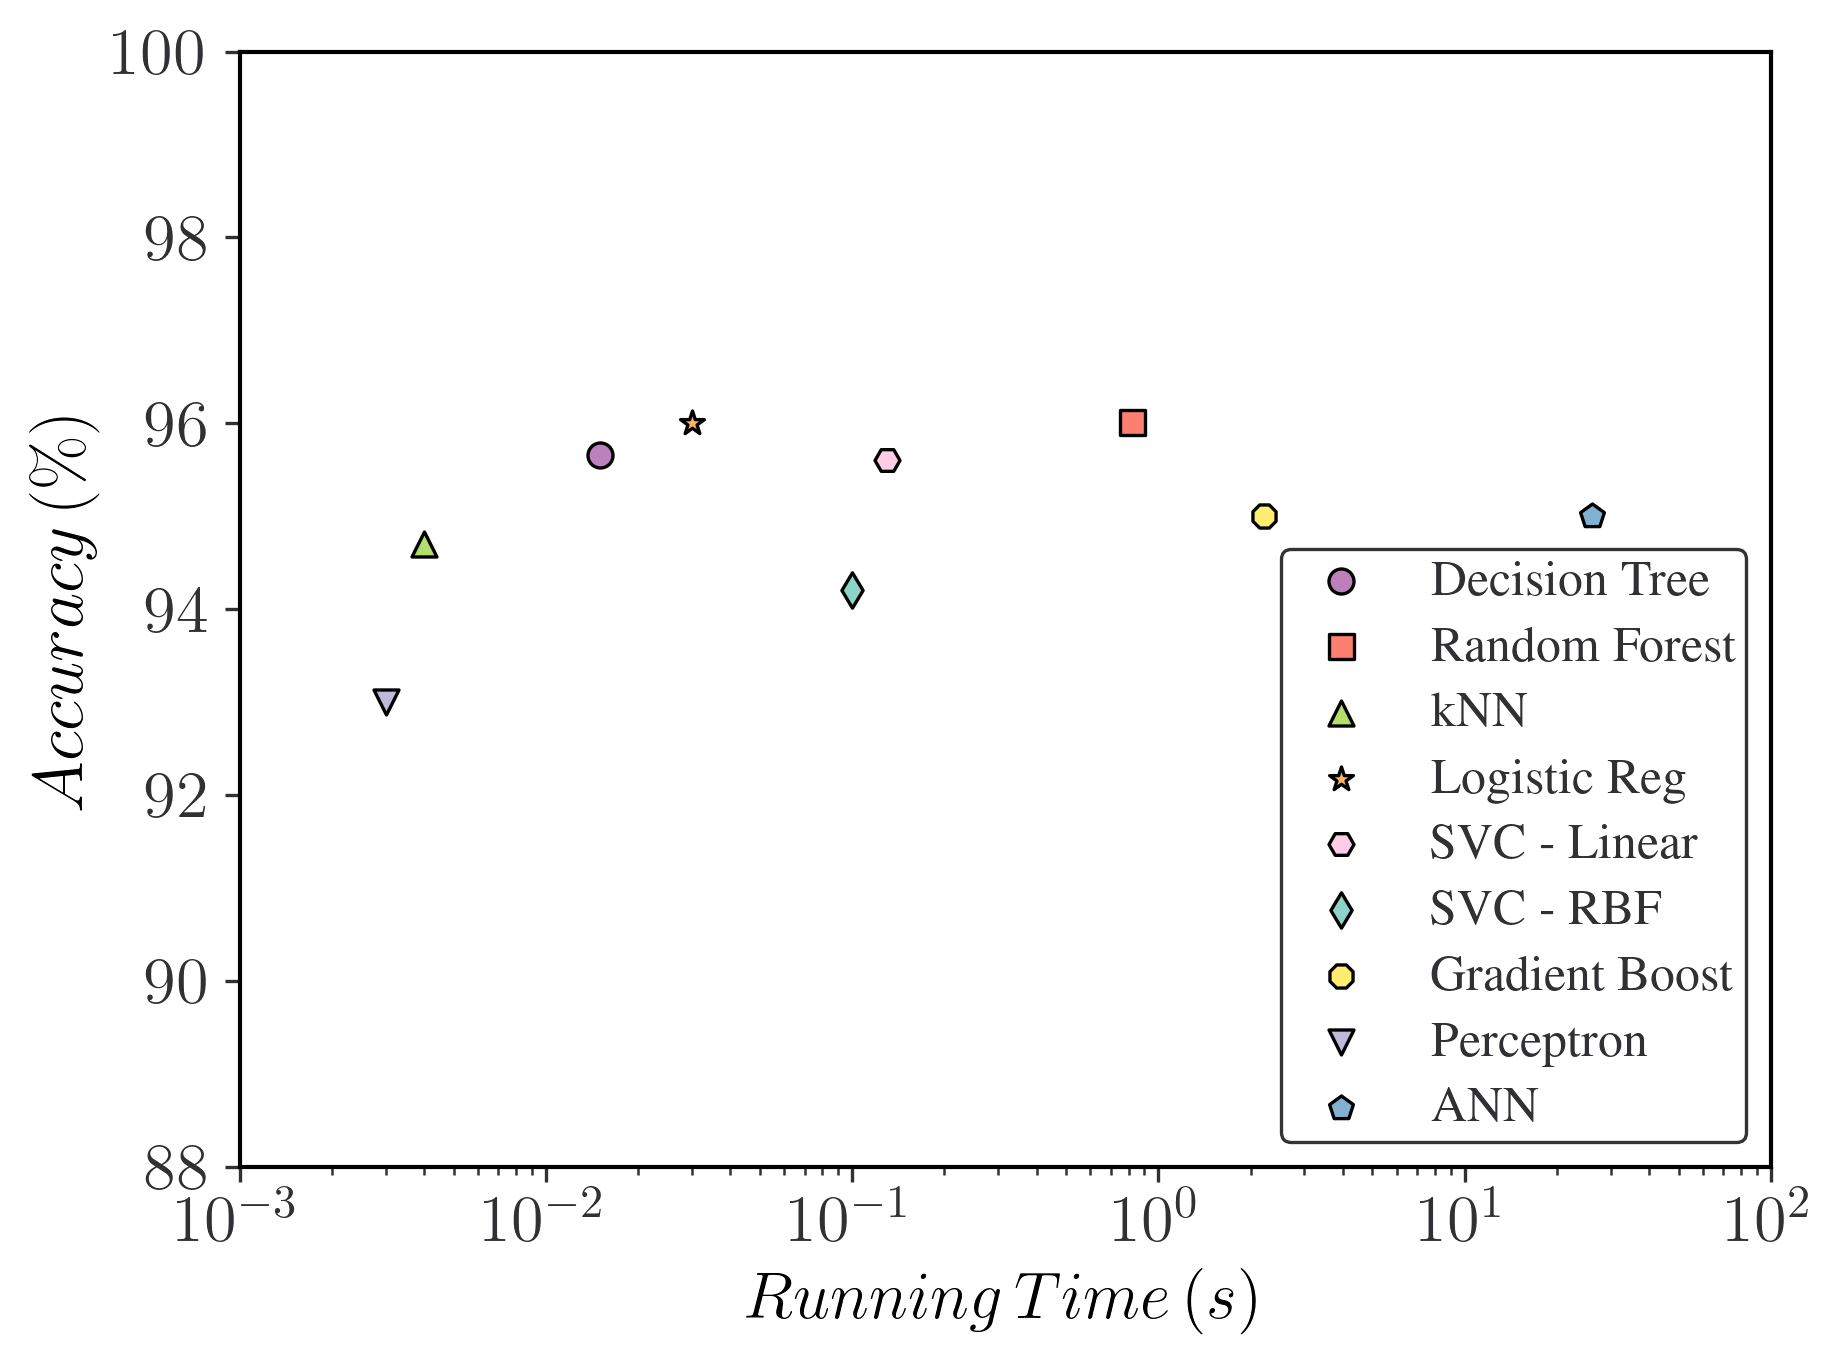

In [25]:
plt.scatter(0.015, 95.66, label = 'Decision Tree')
plt.scatter(0.82, 96, label = 'Random Forest', marker = ",")
plt.scatter(0.004, 94.7, label = 'kNN', marker = "^")
plt.scatter(0.03, 96, label = 'Logistic Reg', marker = "*")
plt.scatter(0.13, 95.6, label = 'SVC - Linear', marker = "H")
plt.scatter(0.10, 94.2, label = 'SVC - RBF', marker = "d")
plt.scatter(2.22, 95, label = 'Gradient Boost', marker = "8")
plt.scatter(0.003, 93, label = 'Perceptron', marker = "v")
plt.scatter(26.1, 95, label = 'ANN', marker = "p")




plt.ylim([88, 100])
plt.xscale('log')
plt.xlabel('$Running\,Time\,(s)$', fontsize = 16)
plt.ylabel('$Accuracy\,(\%)$')
plt.legend(fontsize = 12, loc = 'lower right')
plt.savefig('Algo Comparison.png', dpi = 300)
plt.show()